In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os, glob
from cough_inference import *

In [26]:
DIR_IMGS = 'imgs'
mdl = 'covid_vgg19_trained_1.pkl'
imgs = glob.glob(os.path.join(DIR_IMGS, '*.npy'))
# These are images of sprectograms
imgs

['imgs/both_6821.npy',
 'imgs/both_6835.npy',
 'imgs/both_6820.npy',
 'imgs/both_6836.npy']

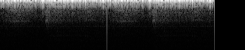

In [27]:
arr = np.load(imgs[0])
img = arr2image(arr)
img

In [28]:
lrn = get_model(mdl)
cat, _, prbs = lrn.predict(img)
cat, prbs

(Category both, tensor([0.4414, 0.1050, 0.1730, 0.2805]))